In [1]:
import numpy as np
from numpy import set_printoptions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [2]:
df1 = pd.read_csv('Dataset of Diabetes .csv')

In [3]:
df1.head(20)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


In [4]:
df1.shape

(1000, 14)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df1['AGE']

0      50
1      26
2      50
3      50
4      33
       ..
995    71
996    31
997    30
998    38
999    54
Name: AGE, Length: 1000, dtype: int64

In [7]:
print(df1['Gender'].value_counts())
print(df1['CLASS'].value_counts())

M    565
F    434
f      1
Name: Gender, dtype: int64
Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64


# Dealing with Categorical Features

    Since our dataset has an object feature 'Gender', i would be encoding it to a numerical feature and then can care of the one instance misinterpeted by 'f' instead of the upper case 'F' as in Female.

    I will also be taking care of 'CLASS' feature as it is categorical, i would be encoding it to a numerical feature, without the use of a label encoder tho, i will be doing it with just the simple .replace( function

In [8]:
df1.iloc[:,2] = df1['Gender'].replace(('F', 'f', 'M'), (0,0,1))
df1.iloc[:,13] = df1['CLASS'].replace(('N', 'N ', 'P', 'Y', 'Y '), (0, 0, 1, 2, 2))

In [9]:
df1.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


In [10]:
#for missing values percent
def get_numerical_summary(df1):
    total = df1.shape[0]
    missing_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df1[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent
missing_percent = get_numerical_summary(df1)

In [11]:
missing_percent

{}

In [12]:
df1.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [13]:
df1.duplicated().sum()

0

# Let's perform some Univariate Analysis on our Dataset

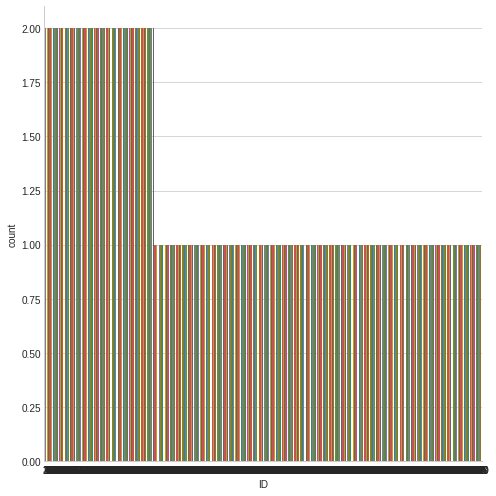

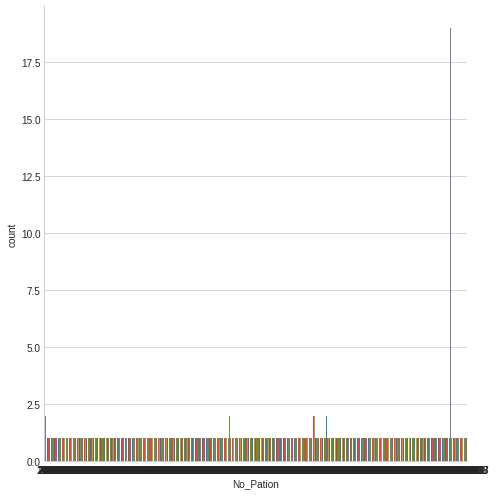

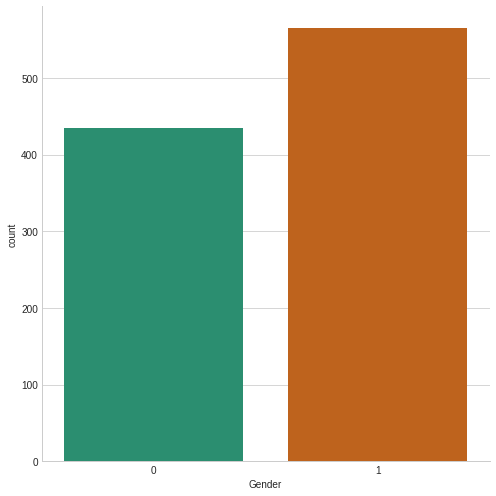

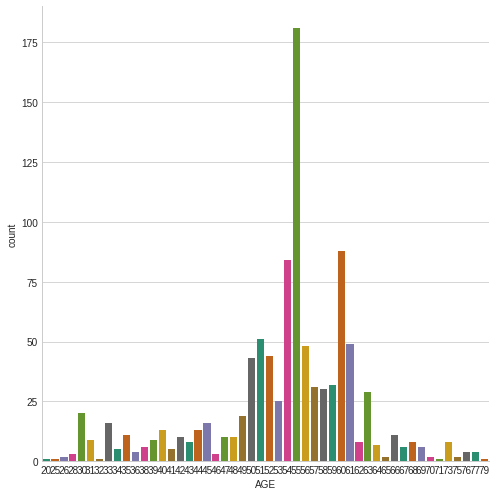

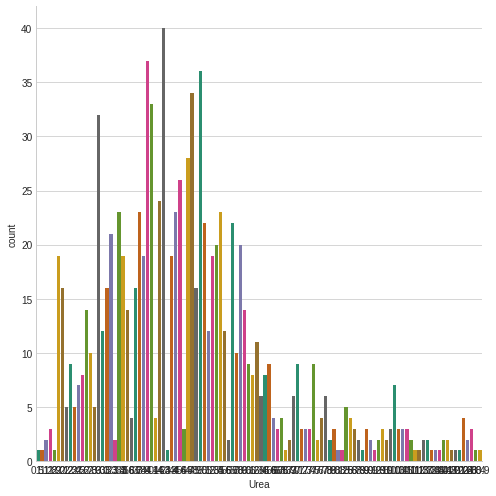

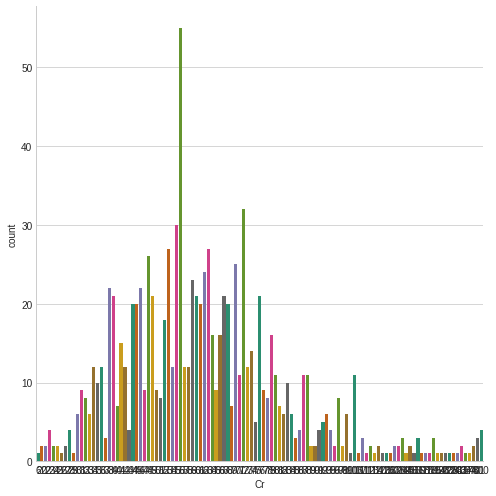

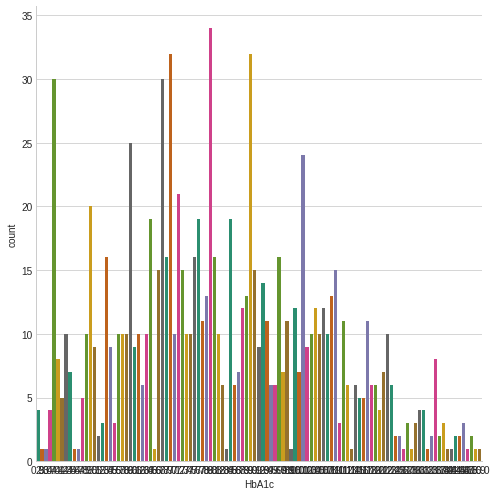

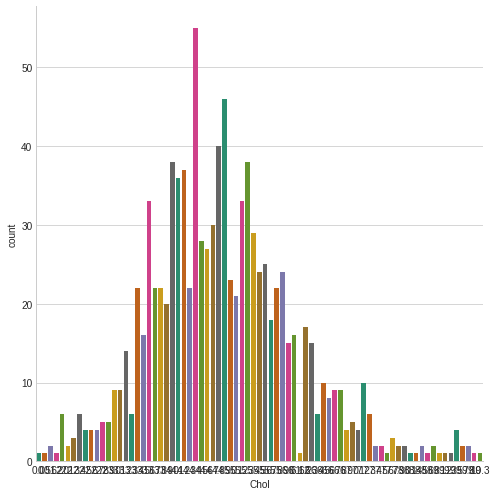

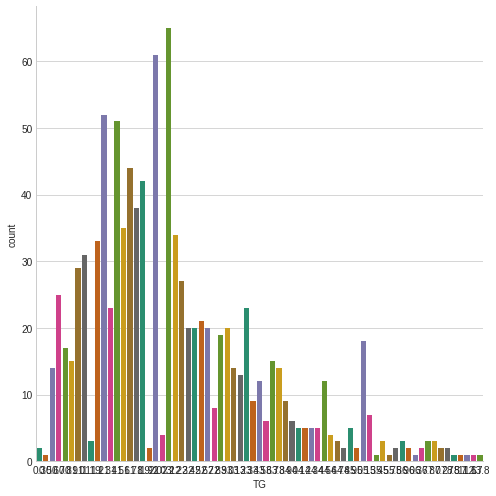

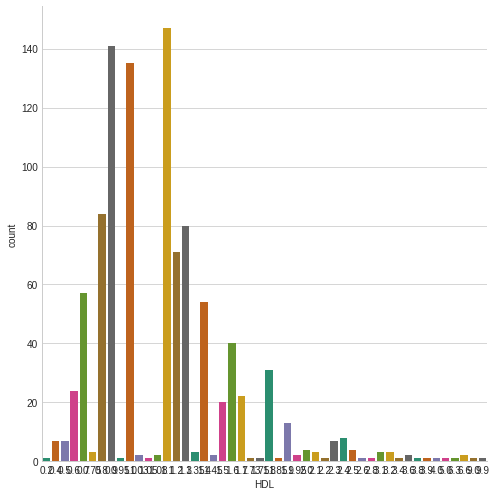

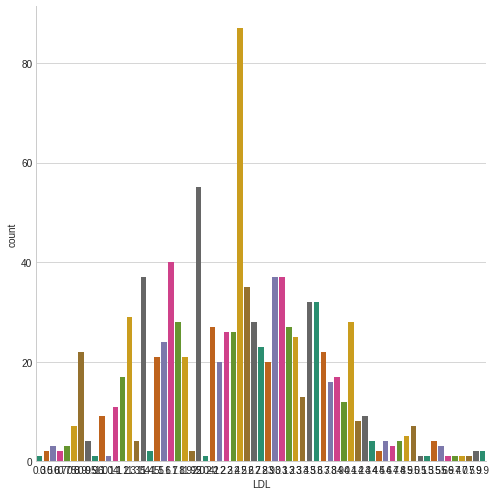

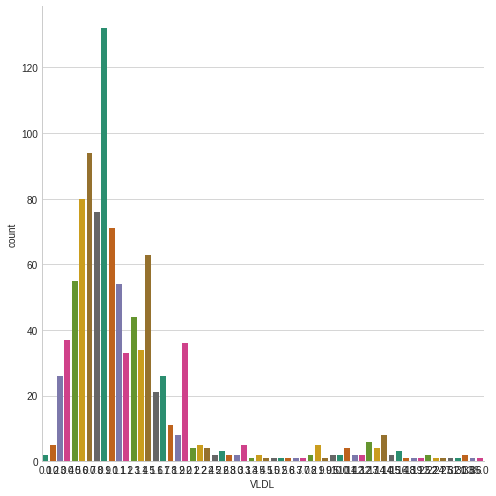

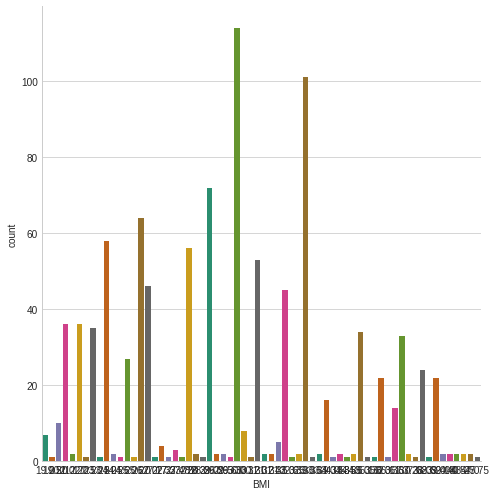

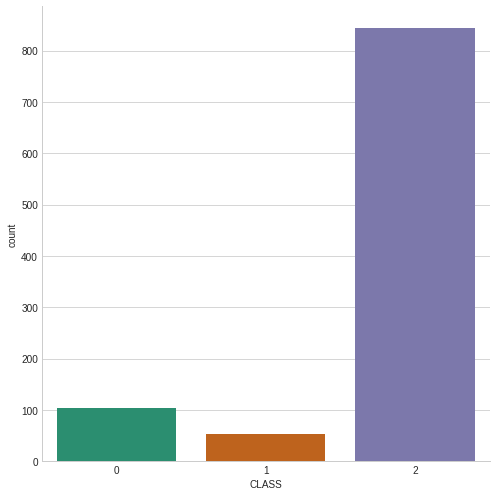

In [14]:
for col in df1.columns.to_list():
    sns.catplot(data= df1, x=col, kind = 'count', legend = True , palette ='Dark2', height =7)
    plt.show()

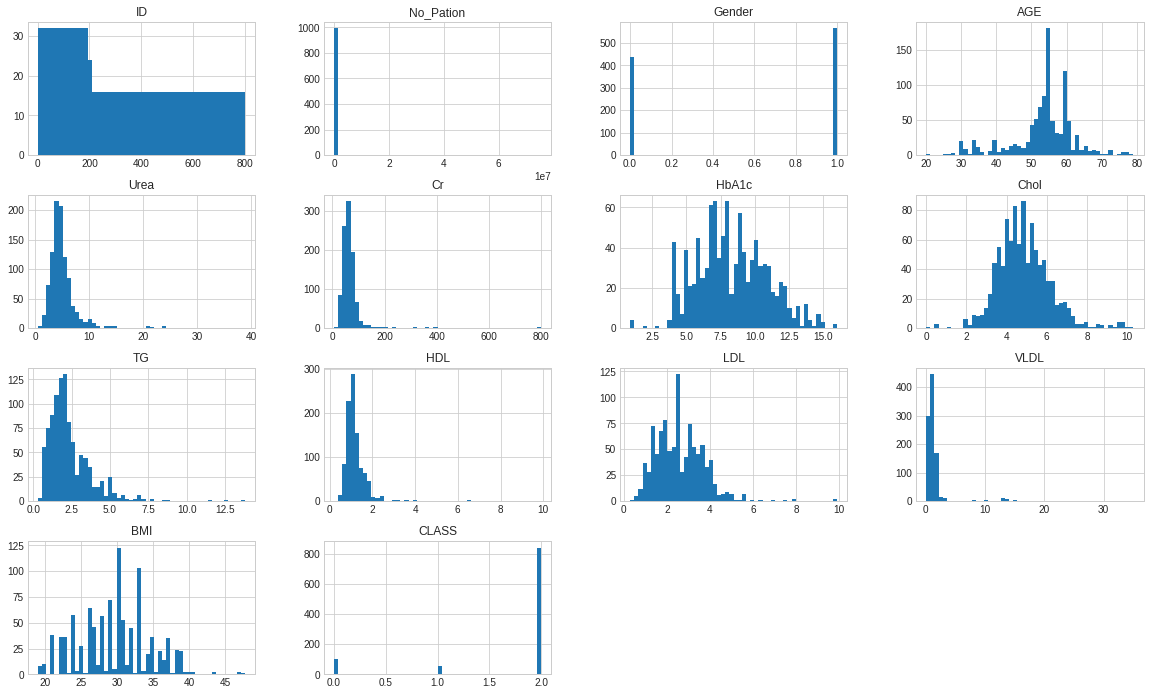

In [15]:
df1.hist(bins=50, figsize=(20,12))
plt.title(col)
plt.show()


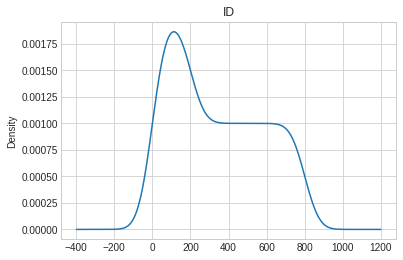

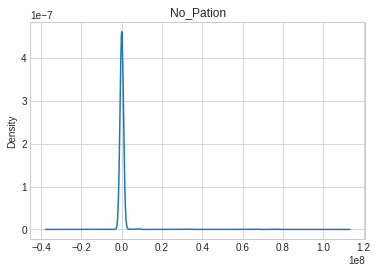

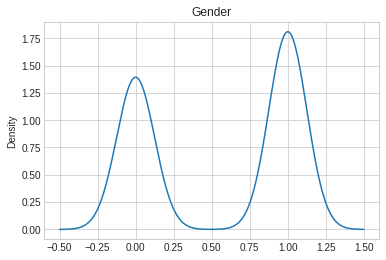

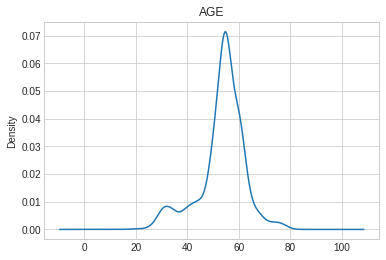

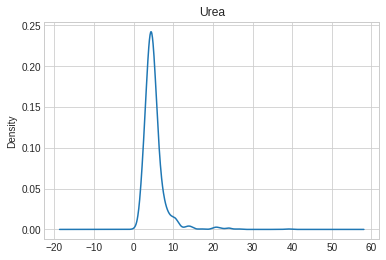

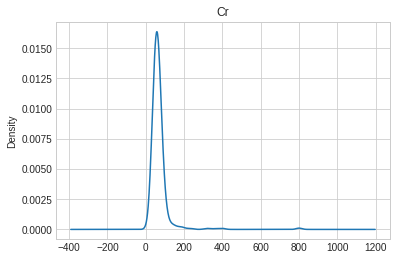

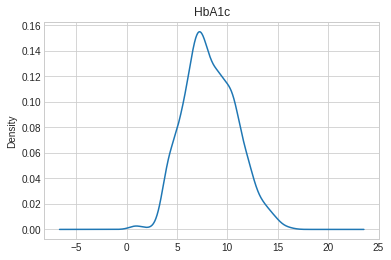

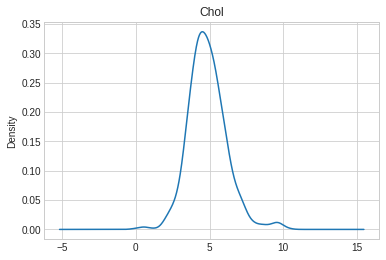

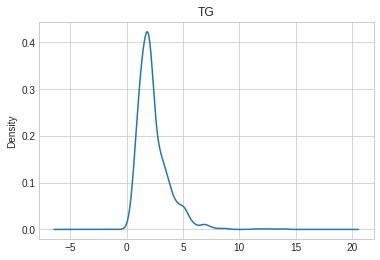

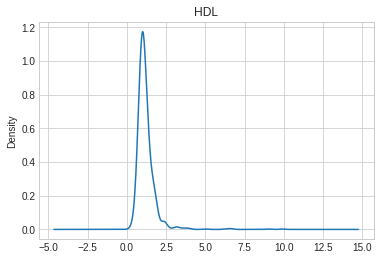

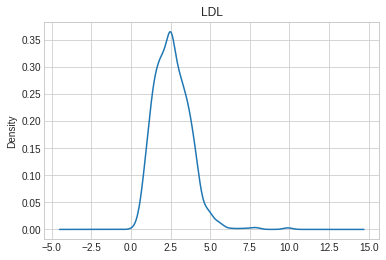

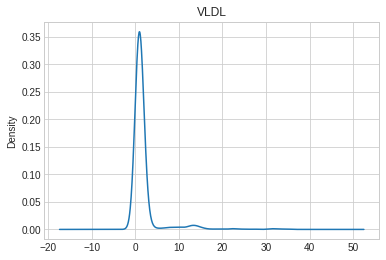

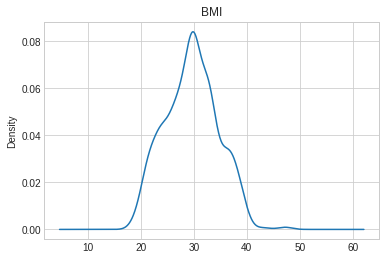

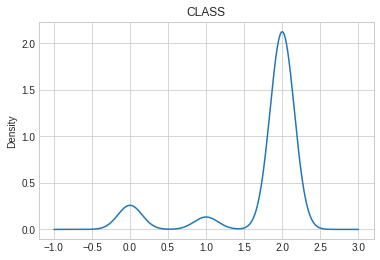

In [16]:
for col in df1.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()

# Bivariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


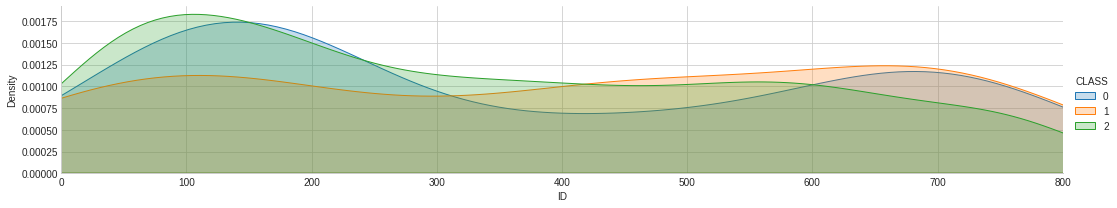

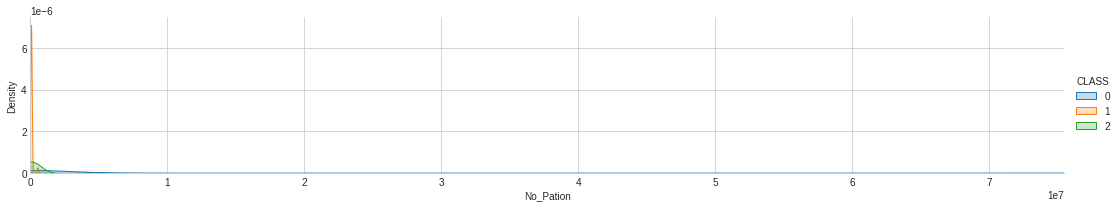

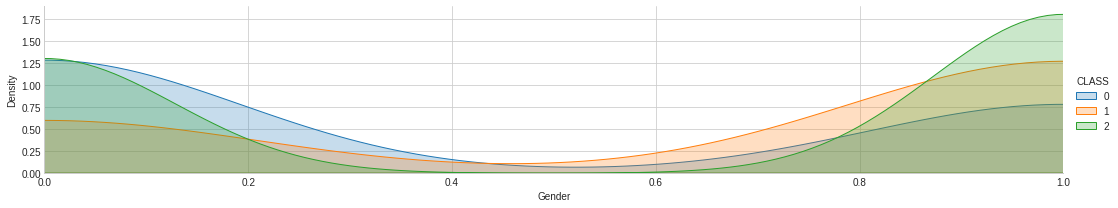

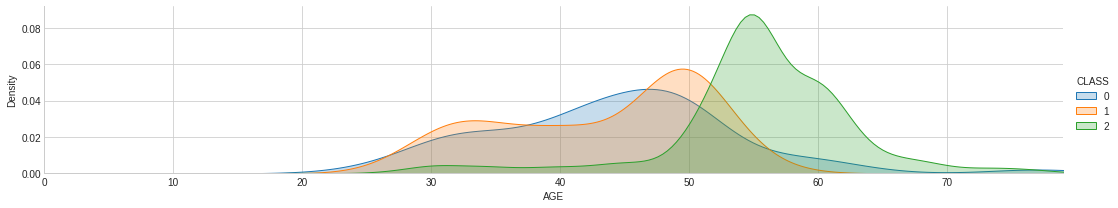

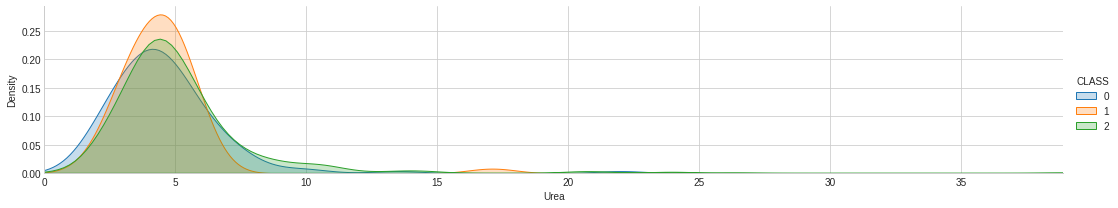

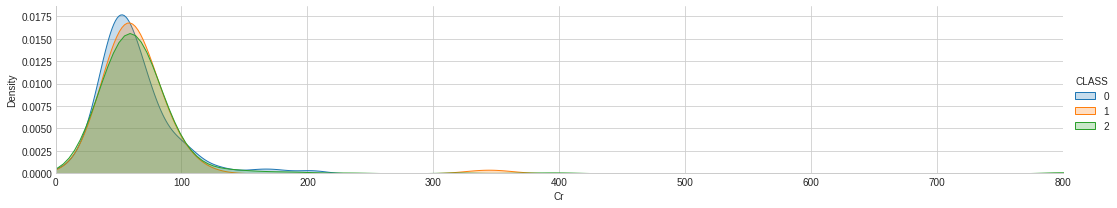

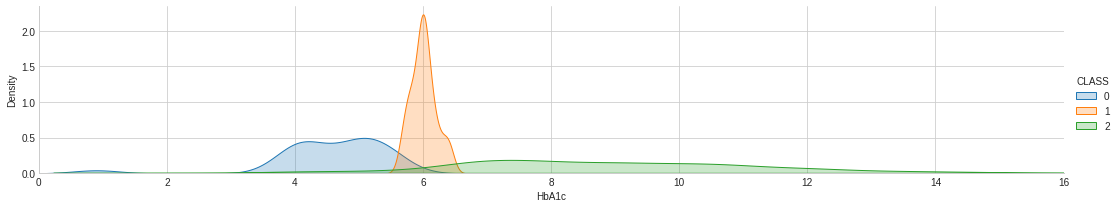

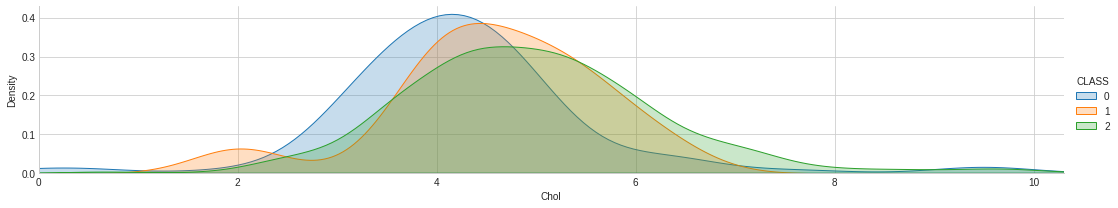

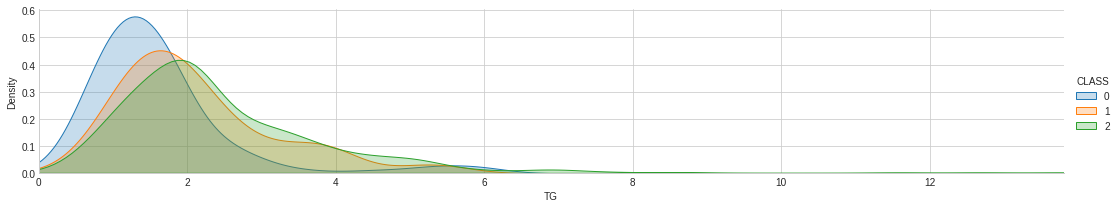

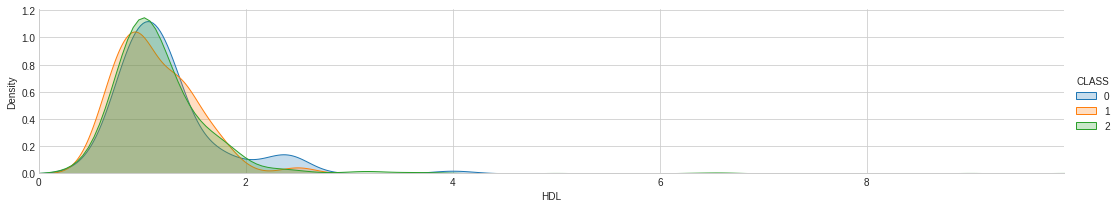

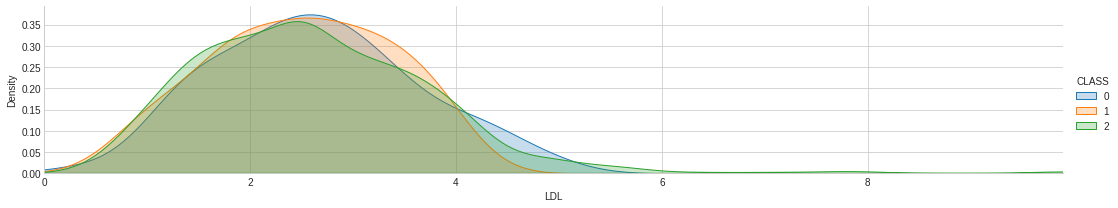

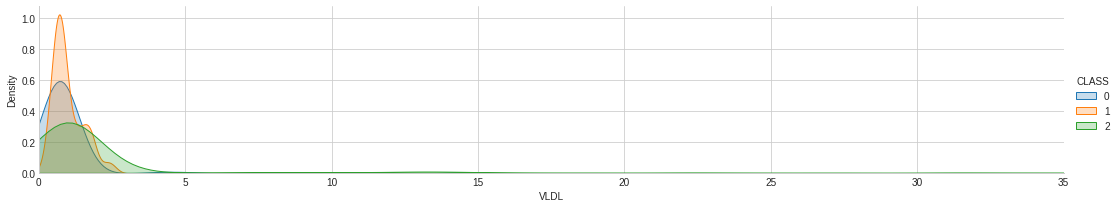

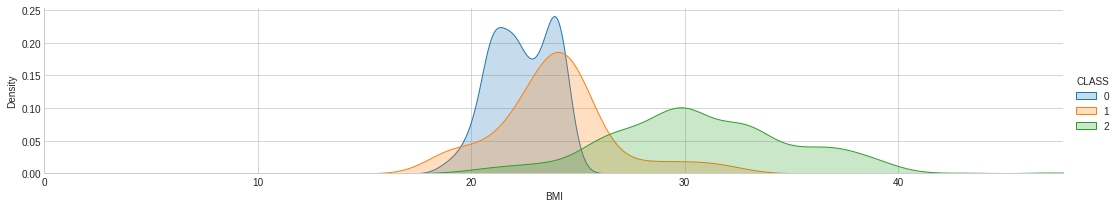

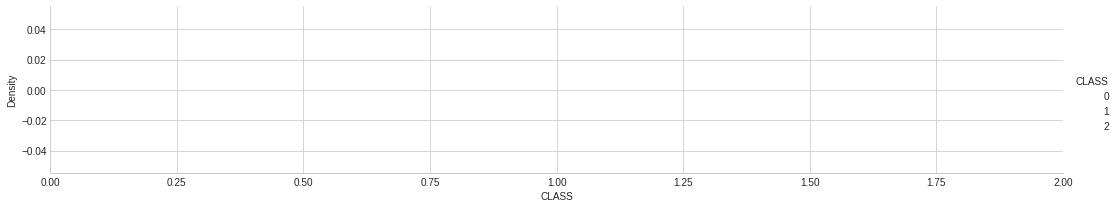

In [17]:
for col in df1.columns.to_list():
    fig1 = sns.FacetGrid(df1 ,hue = 'CLASS', aspect = 5)
    fig1.map(sns.kdeplot, col, shade = True)
    oldest = df1[col].max()
    fig1.set(xlim=(0,oldest))
    fig1.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


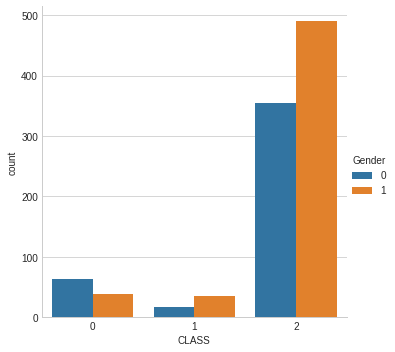

In [18]:
sns.catplot('CLASS',data= df1,hue='Gender',kind = "count")

In [19]:
X = df1.copy()
Y = X.pop('CLASS')

In [20]:
X

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [21]:
discrete_features = X.dtypes == int

In [22]:
discrete_features.dtypes

dtype('bool')

In [23]:


def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores  # show a few features with their MI scores

No_Pation    0.516944
ID           0.448388
HbA1c        0.391225
BMI          0.277595
AGE          0.261041
Cr           0.152571
Chol         0.066787
VLDL         0.057120
TG           0.054794
Urea         0.041455
LDL          0.033013
HDL          0.017990
Gender       0.009078
Name: MI Scores, dtype: float64

### A barh plot to show the Mutual information scores

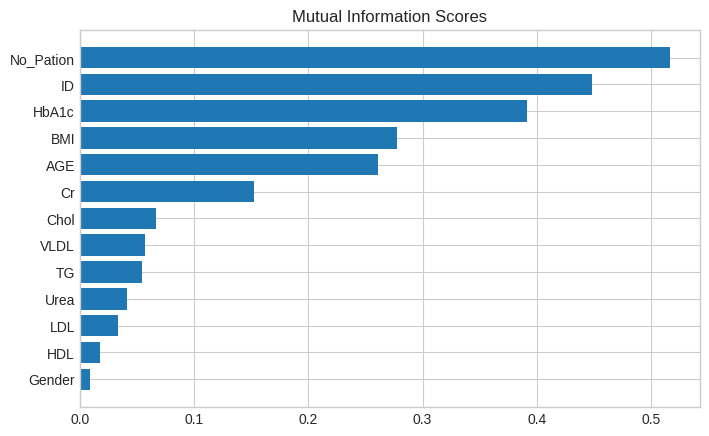

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

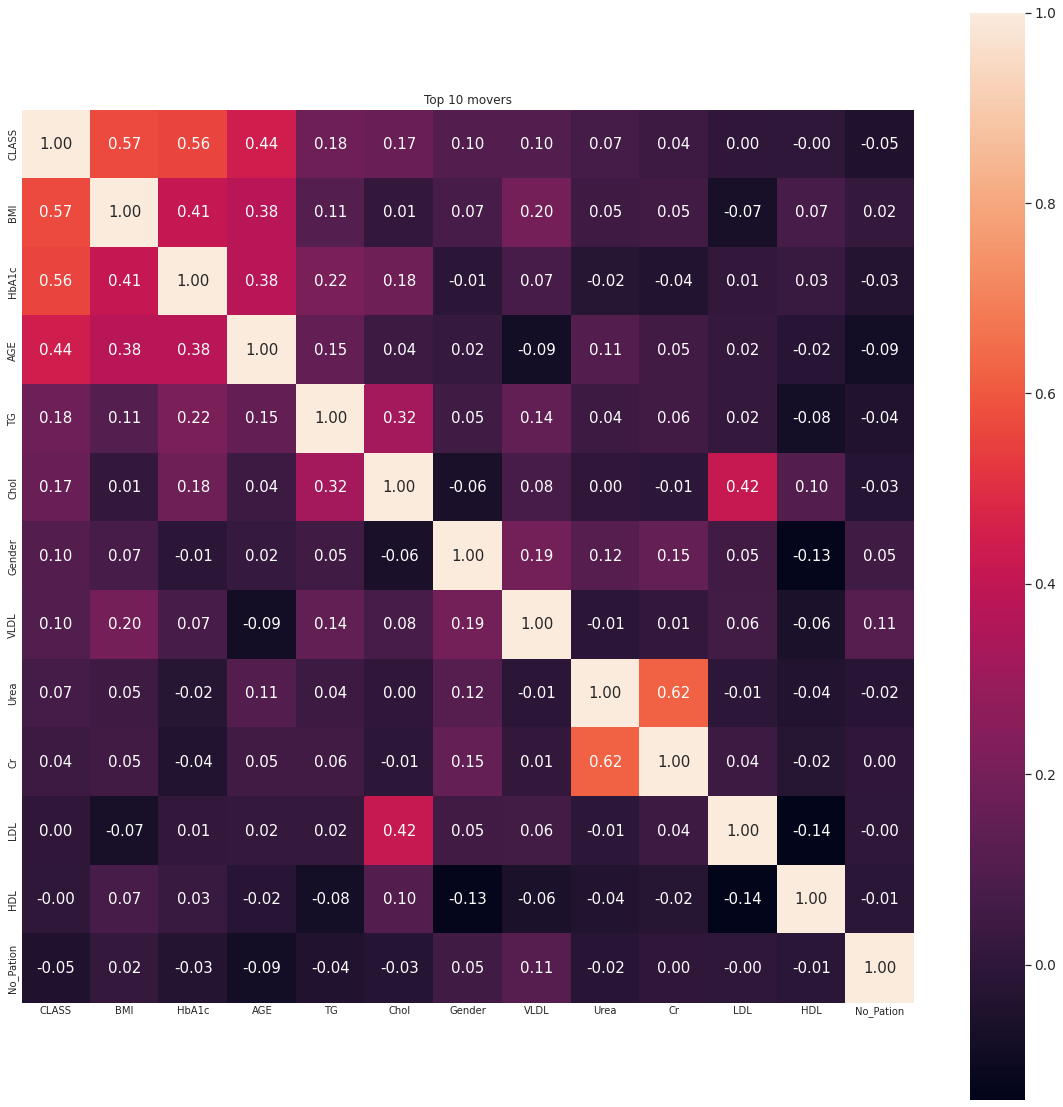

In [25]:
corrmat = df1.corr()
k = 13 #number for the 10 top largest movers of the Absenteeism of employees in hours

plt.figure(figsize=(20,20))
plt.title('Top 10 movers')
cols = corrmat.nlargest(k, 'CLASS')['CLASS'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
df1.groupby('CLASS')['HbA1c', "Cr", 'No_Pation'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,HbA1c,Cr,No_Pation
CLASS,,,
0,4.560194,62.796117,815851.990291
1,6.003774,66.075472,64299.037736
2,8.878270,69.873223,216955.928910


In [27]:
df1.groupby('CLASS')['HbA1c', "Cr", 'No_Pation'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,HbA1c,Cr,No_Pation
CLASS,,,
0,4.9,55.0,34294.0
1,6.0,59.0,45384.0
2,8.8,60.5,34395.5


In [28]:
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [29]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled_df1 = minmaxscaler.fit_transform(X)
scaledx1 = pd.DataFrame(scaled_df1).values

In [30]:
scaler = StandardScaler()
rescaled_df1 = scaler.fit_transform(scaledx1)
RescaledX1 = pd.DataFrame(rescaled_df1).values


In [31]:
normalizer = Normalizer()
normalized_df3 = normalizer.fit_transform(RescaledX1)
Normalizedx1 = pd.DataFrame(normalized_df3, columns = X.columns)

In [32]:
Normalizedx1.head(3)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.202141,-0.022480,-0.342747,-0.120641,-0.043542,-0.115086,-0.401486,-0.153209,-0.311294,0.544571,-0.326443,-0.111262,-0.338221
1,0.381953,-0.016270,0.204125,-0.728154,-0.049541,-0.026940,-0.310565,-0.207914,-0.157742,-0.036917,-0.106407,-0.079712,-0.308531
2,0.101089,-0.020125,-0.348200,-0.122560,-0.044234,-0.116916,-0.407873,-0.155646,-0.316246,0.553234,-0.331636,-0.113032,-0.343602


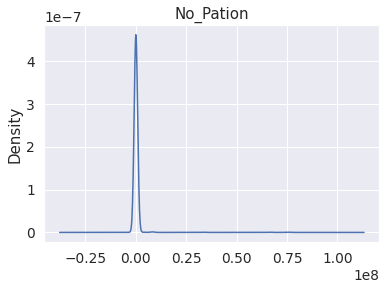

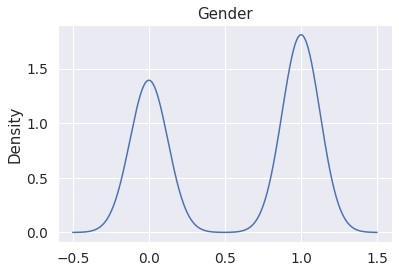

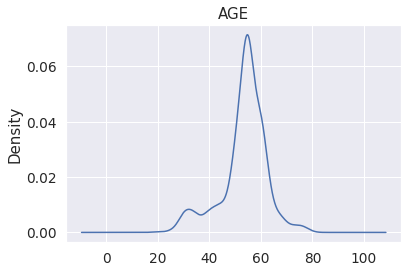

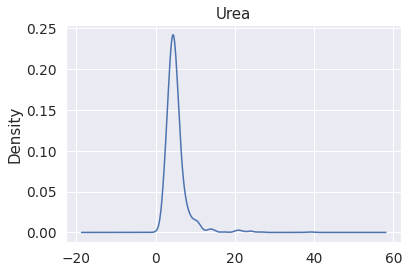

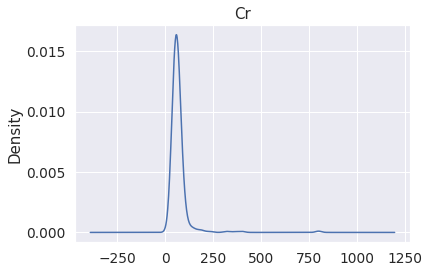

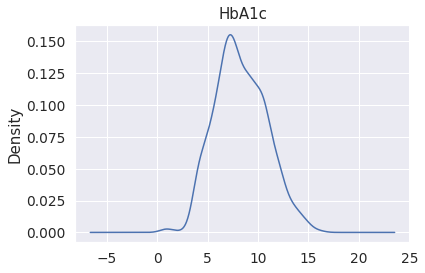

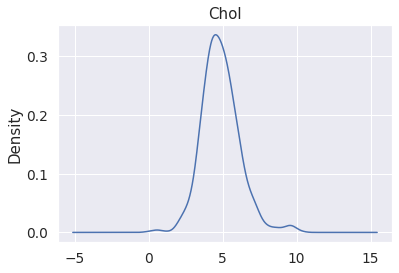

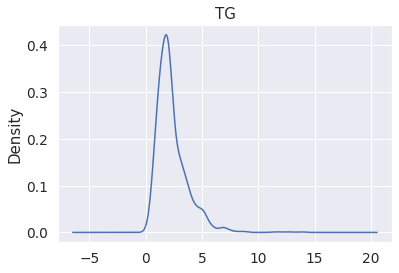

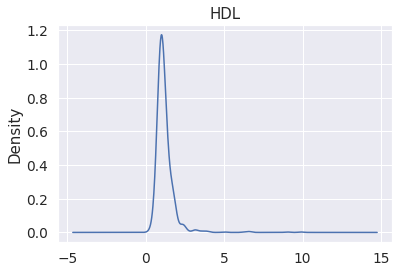

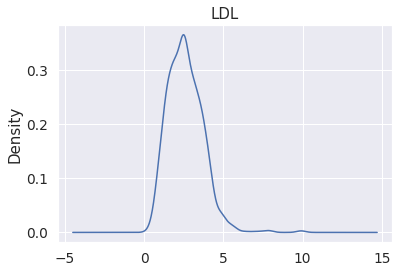

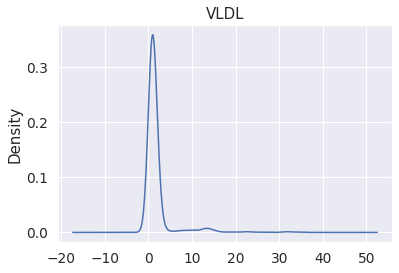

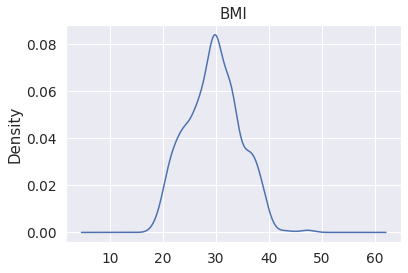

In [35]:
for col in df4.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()

In [34]:
df4 = Normalizedx1.drop('ID', axis = 1)

In [ ]:
Y.value_counts()

In [ ]:
plt.hist(Normalizedx1)
plt.show()

In [36]:
X2 = df4


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = .20,  random_state = 4)

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [40]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [192]:
X_smote, Y_smote = smote.fit_resample(X2, Y)

In [41]:
Y_train_smote.value_counts()

2    676
1    676
0    676
Name: CLASS, dtype: int64

In [42]:
'''poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X2)'''


'poly_features = PolynomialFeatures(degree=2, include_bias=False)\nX_poly = poly_features.fit_transform(X2)'

In [43]:
import lightgbm as lgb

In [49]:
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LogisticRegression(max_iter= 1000))])

In [50]:
polynomial_regression2 = Pipeline([
("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
("clf", RandomForestClassifier(n_estimators = 7, n_jobs = -1 ))])

In [51]:
polynomial_regression3 = Pipeline([
("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
("lgb_model", lgb.LGBMClassifier(n_estimators = 16))])

In [54]:
polynomial_regression.fit(X_train_smote, Y_train_smote)
result = polynomial_regression.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 90.0


In [55]:
polynomial_regression2.fit(X_train_smote, Y_train_smote)
result = polynomial_regression2.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 93.5


In [58]:
polynomial_regression3.fit(X_train_smote, Y_train_smote)
result = polynomial_regression3.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 93.0


In [59]:
result = cross_val_score(polynomial_regression2, X_train_smote, Y_train_smote, cv=6)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

0.46518644635387835
98.17554240631164
[97.63313609 97.92899408 98.52071006 98.81656805 98.52071006 97.63313609]


In [101]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'poly', C= 20)
svc_model.fit(X_train_smote,Y_train_smote)

SVC(C=20, kernel='poly')

In [102]:
Ysv_pred = svc_model.predict(X_test)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Ysv_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.50      0.58      0.54        12
           2       0.99      0.95      0.97       168

    accuracy                           0.92       200
   macro avg       0.72      0.79      0.75       200
weighted avg       0.93      0.92      0.92       200



In [177]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=10))
])
poly_kernel_svm_clf.fit(X_train_smote, Y_train_smote)


Pipeline(steps=[('svm_clf', SVC(C=10, coef0=1, degree=2, kernel='poly'))])

In [178]:
Y_pred =poly_kernel_svm_clf.predict(X_test)

In [179]:
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(Y_test, Y_pred)*100.0)

Accuracy : 93.0


In [183]:
from sklearn.model_selection import KFold

In [184]:
k = 3
kf = KFold(n_splits= k, random_state = 14 ,shuffle = True)

In [191]:

result = cross_val_predict(polynomial_regression3, X_train_smote, Y_train_smote, cv=kf)


In [189]:
print(confusion_matrix(Y_test,result))

[[ 15   1   4]
 [  2   0  10]
 [  4   0 164]]


In [187]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.86      0.50      0.63        12
           2       0.97      0.96      0.97       168

    accuracy                           0.93       200
   macro avg       0.84      0.79      0.79       200
weighted avg       0.94      0.93      0.93       200



In [261]:
rbf_kernel_svm_clf = Pipeline([
("svm_clf", SVC(kernel="rbf", gamma=1.4, C=2.8))
])
rbf_kernel_svm_clf.fit(X_train_smote, Y_train_smote)

Pipeline(steps=[('svm_clf', SVC(C=2.8, gamma=1.4))])

In [262]:

rbf_Ypred= rbf_kernel_svm_clf.predict(X_test)

In [263]:
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(Y_test, rbf_Ypred)*100.0)

Accuracy : 93.0


In [270]:
result = cross_val_score(rbf_kernel_svm_clf, X_smote, Y_smote, cv=kf)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

0.09674130105778618
98.22274881516587
[98.1042654  98.22274882 98.34123223]


In [271]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train_smote, Y_train_smote)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3)

In [272]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
lgb.LGBMClassifier(n_estimators = 16),
algorithm="SAMME.R", learning_rate=.005)
ada_clf.fit(X_train_smote, Y_train_smote)

AdaBoostClassifier(base_estimator=LGBMClassifier(n_estimators=16),
                   learning_rate=0.005)

In [273]:
result = cross_val_score(gbrt, X_smote, Y_smote, cv=kf)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

0.6585044234017782
92.73301737756712
[93.00947867 91.82464455 93.36492891]


In [274]:
result = cross_val_score(ada_clf, X_smote, Y_smote, cv=kf)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

0.6702433944896149
97.39336492890996
[97.86729858 96.44549763 97.86729858]


In [275]:
gbrt_Ypred= gbrt.predict(X_test)
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(Y_test, gbrt_Ypred)*100.0)

Accuracy : 91.5


In [277]:
ada_Ypred= ada_clf.predict(X_test)
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(Y_test, ada_Ypred)*100.0)

Accuracy : 95.5


In [288]:
import xgboost
xgb_class = xgboost.XGBClassifier(n_estimators = 500)
xgb_class.fit(X_train_smote, Y_train_smote)
y_pred = xgb_class.predict(X_test)

In [291]:
result = cross_val_score(xgb_class, X_smote, Y_smote, cv=6)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

3.2818455624869243
98.06477093206951
[ 90.75829384  99.52606635  99.76303318 100.          99.28909953
  99.0521327 ]


In [294]:

xgb_pred = cross_val_predict(xgb_class, X_smote, Y_smote, cv=kf)

In [298]:
print(classification_report(Y_smote,xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       844
           1       0.98      1.00      0.99       844
           2       1.00      0.97      0.98       844

    accuracy                           0.99      2532
   macro avg       0.99      0.99      0.99      2532
weighted avg       0.99      0.99      0.99      2532



In [297]:
print(confusion_matrix(Y_smote, xgb_pred))

[[838   4   2]
 [  1 841   2]
 [ 14  13 817]]


In [299]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators = 500)
default_params = lgb_model.get_params()

In [300]:
del default_params['n_estimators']

In [301]:
train_set = lgb.Dataset(data = X_train, label = Y_train)
test_set = lgb.Dataset(data = X_test, label = Y_test)

In [302]:
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, metrics = 'auc', nfold = 5, seed = 42)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


In [303]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'.format(cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['auc-mean'])))

The maximum validation ROC AUC was: 0.97803 with a standard deviation of 0.00816.
The optimal number of boosting rounds (estimators) was 16.


In [304]:
from sklearn.metrics import roc_auc_score

In [305]:

lgb_model.n_estimators = len(cv_results['auc-mean'])

In [306]:
lgb_model.fit(X_train_smote, Y_train_smote)

LGBMClassifier(n_estimators=16)

In [307]:
lgb_preds = lgb_model.predict(X_test)

In [308]:
print(classification_report(Y_test, lgb_preds))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.77      0.83      0.80        12
           2       0.99      0.96      0.98       168

    accuracy                           0.95       200
   macro avg       0.84      0.91      0.87       200
weighted avg       0.96      0.95      0.95       200



In [309]:
from sklearn.ensemble import VotingClassifier

In [310]:
voting_clf = VotingClassifier(
estimators=[('polynomial_regression', polynomial_regression), ('polynomial_regression2', polynomial_regression2), ('polynomial_regression3', polynomial_regression3), ('poly_kernel_svm_clf', poly_kernel_svm_clf), ('rbf_kernel_svm_clf', rbf_kernel_svm_clf), ('gbrt', gbrt), ('ada_clf', ada_clf), ('xgb_class', xgb_class) , ('svc_model', svc_model),('lgb_model', lgb_model) ],
voting='hard')
voting_clf.fit(X_train_smote, Y_train_smote)

VotingClassifier(estimators=[('polynomial_regression',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(include_bias=False)),
                                              ('lin_reg',
                                               LogisticRegression(max_iter=1000))])),
                             ('polynomial_regression2',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(degree=4,
                                                                  include_bias=False)),
                                              ('clf',
                                               RandomForestClassifier(n_estimators=7,
                                                                      n_jobs=-1))])),
                             ('poly...
                                               SVC(C=2.8, gamma=1.4))])),
                          

In [ ]:
result = cross_val_score(voting_clf, X_train_smote, Y_train_smote, cv=6)
print(result.std()*100.0)
print(result.mean()*100.0)
print(result*100.0)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (lgb_model, polynomial_regression, polynomial_regression3, polynomial_regression2,  poly_kernel_svm_clf,  rbf_kernel_svm_clf,  gbrt,  ada_clf, xgb_class, svc_model,  voting_clf):
    clf.fit(X_train_smote, Y_train_smote)
    result = cross_val_score(clf, X_smote, Y_smote, cv=6)
    print(clf.__class__.__name__, result.std()*100.0)
    print(clf.__class__.__name__,result.mean()*100.0)
    print(clf.__class__.__name__,result*100.0)

LGBMClassifier 4.242853331419186
LGBMClassifier 96.80094786729858
LGBMClassifier [87.44075829 98.1042654  98.57819905 99.52606635 99.52606635 97.63033175]
Pipeline 4.855892963485251
Pipeline 92.77251184834124
Pipeline [85.07109005 95.02369668 96.20853081 97.39336493 95.97156398 86.96682464]
Pipeline 3.755299100953338
Pipeline 97.43285939968403
Pipeline [ 89.09952607  98.81516588  99.28909953 100.          98.81516588
  98.57819905]
Pipeline 3.302455759931575
Pipeline 97.70932069510269
Pipeline [ 90.52132701  99.28909953  99.76303318  99.0521327  100.
  97.63033175]
Pipeline 3.405009791041169
Pipeline 96.72195892575039
Pipeline [90.75829384 98.34123223 99.0521327  99.0521327  99.76303318 93.36492891]
Pipeline 3.5713572649694463
Pipeline 96.7219589257504
Pipeline [90.52132701 98.34123223 99.76303318 99.52606635 99.0521327  93.12796209]
GradientBoostingClassifier 4.16867834010309
GradientBoostingClassifier 92.69352290679306
GradientBoostingClassifier [85.30805687 94.31279621 95.02369668 9

In [ ]:
mfrom sklearn.metrics import accuracy_score
for clf in (lgb_model, polynomial_regression, polynomial_regression3, polynomial_regression2,  poly_kernel_svm_clf,  rbf_kernel_svm_clf,  gbrt,  ada_clf, xgb_class, svc_model,  voting_clf):
    clf.fit(X_train_smote, Y_train_smote)
    VC_Ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, VC_Ypred))


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder()

In [ ]:

'''model.add(Dense(12, input_dim= 12))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1), use_bias= False))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1), use_bias = False))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'relu',kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1),  use_bias = False))
model.add(Dense(3, activation = 'softmax',))'''

In [ ]:
'''model.add(Dense(13,activation = 'elu', input_dim= 13))
model.add(Dense(4, activation = 'relu', use_bias= False))
model.add(Dense(3, activation = 'relu',  use_bias = False))
model.add(Dense(3, activation = 'relu', use_bias = False))
model.add(Dense(3, activation = 'softmax'))
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)'''

In [ ]:
import keras

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
from keras.optimizers import SGD


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(12, input_dim= 12))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'relu',  use_bias = False))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'relu',  use_bias = False))
model.add(Dense(3, activation = 'softmax',))

In [ ]:
model.summary()

In [ ]:
X3 = df1.drop('CLASS', axis = 1)
Y3 = pd.get_dummies(Y
                  )

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size = .20,  random_state = 4)

In [ ]:
X2_train.shape

In [ ]:
X_train_smote, Y_train_smote = smote.fit_resample(X2_train, Y2_train)

In [ ]:
Y_train_smote_dummy=pd.get_dummies(Y_train_smote)

In [ ]:

Y2_test_dummy = pd.get_dummies(Y2_test)

In [ ]:
Y2_test_dummy.shape

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, test_size = .20, )

In [ ]:
learning_rate = 0.001
weight_decay = 1e-6
momentum = 0.9

In [ ]:
sgd = SGD(learning_rate=learning_rate, decay=weight_decay, nesterov=True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30,
restore_best_weights=True)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= sgd, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_smote, Y_train_smote_dummy, epochs=300, validation_data=(X2_test, Y2_test_dummy), callbacks = early_stopping_cb)


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
